## Review Paper: Feature Importance

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
pd.options.display.float_format = '{:.2f}'.format
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from time import time
import matplotlib.ticker as tkr
from scipy import stats
%matplotlib inline

import IPython.core.display as di
# This line will hide code by default when the notebook is exported as HTML
di.display_html('<script>jQuery(function() {if (jQuery("body.notebook_app").length == 0) { jQuery(".input_area").toggle(); jQuery(".prompt").toggle();}});</script>', raw=True)

In [2]:
df=pd.read_excel('hourlyElectricityWithFeatures.xlsx')
df['Date']=pd.to_datetime(df['Date']) 
df['year'] = df['Date'].apply(lambda x: x.year)
df['quarter'] = df['Date'].apply(lambda x: x.quarter)
df['month'] = df['Date'].apply(lambda x: x.month)
df['day'] = df['Date'].apply(lambda x: x.day)
df["weekday"]=df.apply(lambda row: row["Date"].weekday(),axis=1)
df["weekday"] = (df["weekday"] < 5).astype(int)
df.set_index('Date',inplace=True);
print('No. of rows and columns:', df.shape)
df.head(3)

No. of rows and columns: (23072, 21)


,Consumption,startTime,endTime,RH-%,T-C,Tdew-C,pressure-mbar,solarRadiation-W/m2,windDirection,windSpeed-m/s,...,coolingDegrees,heatingDegrees,dehumidification,occupancy,cosHour,year,quarter,month,day,weekday
Date,,,,,,,,,,,,,,,,,,,,,
2012-01-01 01:00:00,111.48,2012-01-01 01:00:00,2012-01-01 02:00:00,87.00,4.00,1.90,1004.00,0.00,310.00,4.17,...,0.00,11.00,0.00,0.00,0.87,2012,1,1,1,0
2012-01-01 02:00:00,117.99,2012-01-01 02:00:00,2012-01-01 03:00:00,87.00,4.00,1.90,1005.00,0.00,280.00,4.17,...,0.00,11.00,0.00,0.00,0.97,2012,1,1,1,0
2012-01-01 03:00:00,119.01,2012-01-01 03:00:00,2012-01-01 04:00:00,81.00,5.00,1.90,1006.00,0.00,270.00,4.17,...,0.00,10.00,0.00,0.00,1.00,2012,1,1,1,0


### Checking Outliers

In [3]:
# Cleaning
df.loc[df['Consumption']>434,'Consumption']=435
#Checking outliers
len(df[df.Consumption.between(436, 628, inclusive=True)]['Consumption'])

0

In [4]:
print(df.occupancy.unique()) #Unique Occupancy Values
print(df.weekday.unique())
print(df.quarter.unique())
a=pd.DataFrame(df.isnull().sum()) # Check Null Values
a.transpose()

[0.  0.3 1.  0.5 0.4 0.2 0.6 0.1]
[0 1]
[1 2 3 4]


,Consumption,startTime,endTime,RH-%,T-C,Tdew-C,pressure-mbar,solarRadiation-W/m2,windDirection,windSpeed-m/s,...,coolingDegrees,heatingDegrees,dehumidification,occupancy,cosHour,year,quarter,month,day,weekday
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


count   23072.00
mean      217.62
std        84.27
min        12.00
25%       146.86
50%       192.72
75%       287.25
max       435.00
Name: Consumption, dtype: float64
Kurtosis of normal distribution (should be 0): -0.9355155171683771
Skewness of normal distribution (should be 0): 0.5357888479071903


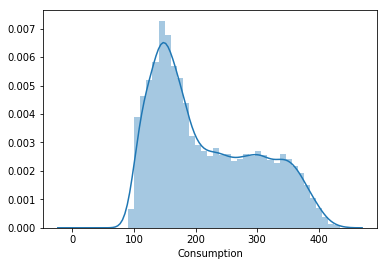

In [6]:
print(df.Consumption.describe())

sns.distplot(df.Consumption);

stats.normaltest(df.Consumption)
#This function tests the null hypothesis that a sample comes from a normal distribution. 
# It is based on D'Agostino and Pearson's test that combines skew and kurtosis to produce
# an omnibus test of normality.
print( 'Kurtosis of normal distribution (should be 0): {}'.format(stats.kurtosis(df.Consumption)))
print( 'Skewness of normal distribution (should be 0): {}'.format(stats.skew(df.Consumption)))

In [7]:
log_data = np.log(df.Consumption)

varible is not normal


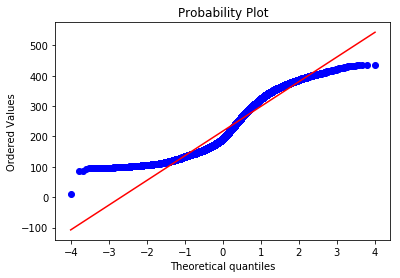

In [8]:
from scipy import stats
res = stats.probplot(df.Consumption, plot=plt)
k,p=stats.mstats.normaltest(df.Consumption) # k = z-score returned by skewtest and k is the z-score returned by kurtosistest. p= p-value

# we use p value to test if the variable is normal or not
if p<0.05:
  print ('varible is not normal')
else:
  print ('variable is normal')

varible is not normal


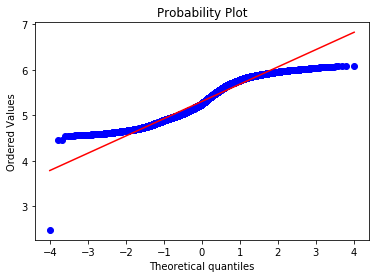

In [9]:
from scipy import stats
res = stats.probplot(log_data, plot=plt)
k,p=stats.mstats.normaltest(log_data) # k = z-score returned by skewtest and k is the z-score returned by kurtosistest. p= p-value

# we use p value to test if the variable is normal or not
if p<0.05:
  print ('varible is not normal')
else:
  print ('variable is normal')

In [11]:
data=df.Consumption

### Time Series Plot

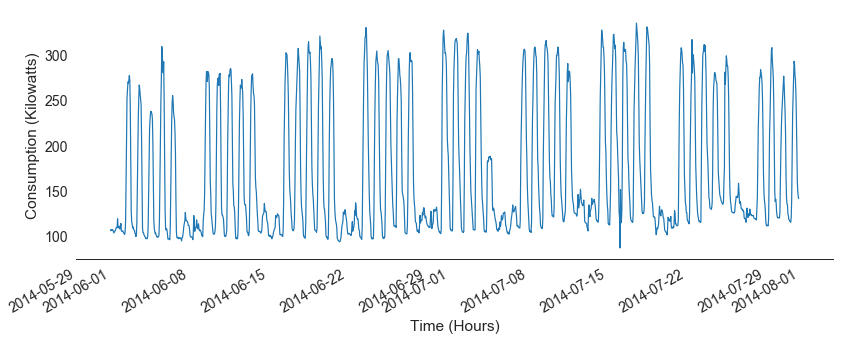

In [12]:
df1=df.loc[:,['Time','Consumption']]
df2=df1[(df1.index>='2014-06-01') & (df1.index<'2014-08-01')]
#a=plt.figure(figsize=(15,6))
#sns.set_style("whitegrid", {'axes.grid' : False});
sns.set_style('white')
sns.set_context("paper", font_scale=1.6)  
#a = fig.gca()  
ax=df2.plot(figsize=(12,5),color='#1f77b4');
#plt.tick_params(left=False, labelleft=True) #remove ticks
#plt.box(False)
plt.xlabel('Time (Hours)')
plt.ylabel('Consumption (Kilowatts)')
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
plt.legend().set_visible(False)
plt.tight_layout()
sns.despine(left=True)
plt.savefig('Fig1.png', bbox_inches='tight', dpi=400) 
plt.show()

### Consumption by Year & Quarter

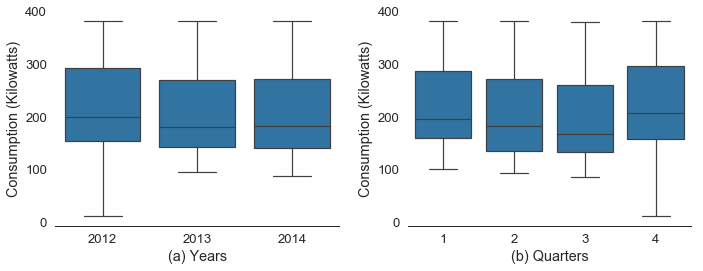

In [13]:
q = df["Consumption"].quantile(0.97)
dfq=df[df["Consumption"] < q]
sns.set_style('white')
sns.set_context("paper", font_scale=1.5)  
a=plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.subplots_adjust(wspace=0.2)
ax=sns.boxplot(x="year", y="Consumption", data=dfq, color='#1f77b4');
plt.ylabel('Consumption (Kilowatts)')
plt.xlabel('(a) Years')
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
sns.despine(left=True);
plt.tight_layout() 

plt.subplot(1,2,2)

ax=sns.boxplot(x="quarter", y="Consumption", data=dfq, color='#1f77b4');
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
plt.xlabel('(b) Quarters')
plt.ylabel('Consumption (Kilowatts)')
sns.despine(left=True);
plt.tight_layout() 

#plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.2, hspace=None)
#plt.savefig('Fig2.png', bbox_inches='tight', dpi=350)

,count,mean,std,min,25%,50%,75%,max
Consumption,23072.00,217.62,84.27,12.00,146.86,192.72,287.25,435.00


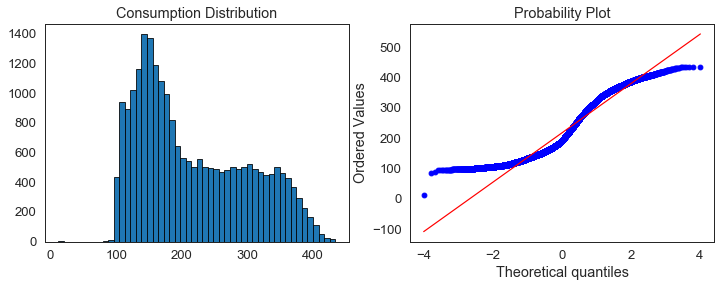

In [14]:
df1=df.loc[:,['Consumption']]
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
df['Consumption'].hist(bins=50,edgecolor='black', grid=False)
plt.title('Consumption Distribution')

plt.subplot(1,2,2)
stats.probplot(df['Consumption'], plot=plt);
#print("Skewness: %f" % df['Consumption'].skew())
#print("Kurtosis: %f" % df['Consumption'].kurt())
df1.describe().transpose()

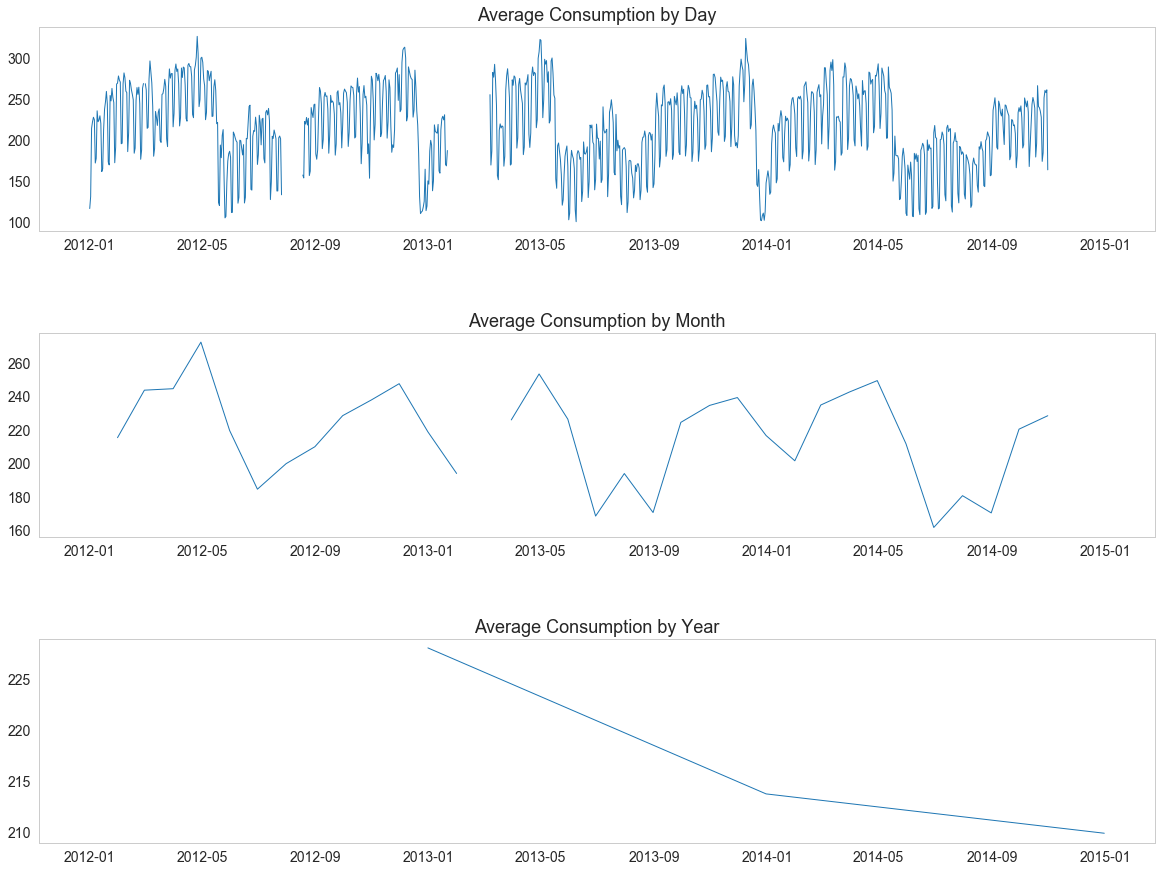

In [15]:
sns.set_style("whitegrid", {'axes.grid' : False})
fig = plt.figure(figsize=(20,15))
fig.subplots_adjust(hspace=.5)
ax1 = fig.add_subplot(3,1,1)
ax1.plot(df1['Consumption'].resample('D').mean(),linewidth=1)
ax1.set_title('Average Consumption by Day', fontsize=18)
#ax1.set_ylabel('Average Consumption', fontsize=14)
#ax1.set_xlabel('Day of Crime', fontsize=14)
ax1.tick_params(axis='both', which='major', labelsize=14)

ax2 = fig.add_subplot(3,1,2, sharex=ax1)
ax2.plot(df1['Consumption'].resample('M').mean(),linewidth=1)
ax2.set_title('Average Consumption by Month', fontsize=18)
#ax2.set_ylabel('# of Crimes', fontsize=14)
#ax2.set_xlabel('Month of Crime', fontsize=14)
ax2.tick_params(axis='both', which='major', labelsize=14)

ax3  = fig.add_subplot(3,1,3, sharex=ax1)
ax3.plot(df1['Consumption'].resample('A').mean(),linewidth=1)
ax3.set_title('Average Consumption by Year', fontsize=18)
#ax3.set_ylabel('# of Crimes', fontsize=14)
#ax3.set_xlabel('Year of Crime', fontsize=14)
ax3.tick_params(axis='both', which='major', labelsize=14)

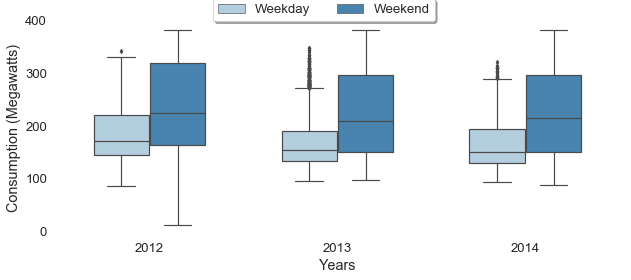

In [16]:
q = df["Consumption"].quantile(0.97)
dfq=df[df["Consumption"] < q]

dic={0:'Weekday',1:'Weekend'}
dfq['Day'] = dfq.weekday.map(dic)

a=plt.figure(figsize=(9,4))
sns.set_context("paper", font_scale=1.5)  
ax=sns.boxplot('year','Consumption',hue='Day',width=0.6,fliersize=3,
                    data=dfq, palette='Blues');         
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
#plt.title('Box Plot of Consumption by Weekend/Weekday')    
a.legend(loc='upper center', bbox_to_anchor=(0.5, 1.00), shadow=True, ncol=2)
sns.despine(left=True, bottom=True) 
plt.ylabel('Consumption (Megawatts)')
plt.xlabel('Years')
plt.tight_layout()                                                                                                                  
plt.legend().set_visible(False)
plt.savefig('Fig3.png', dpi=350)

### Correlations

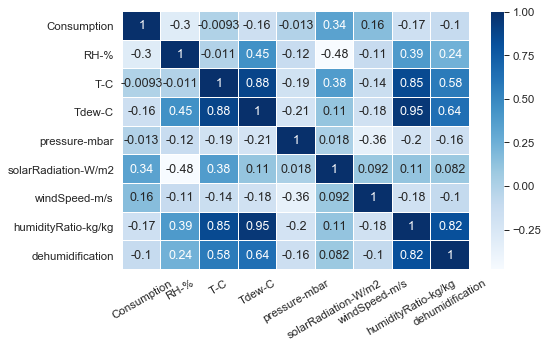

In [17]:
dfc=df.loc[:,['Consumption', 'RH-%', 'T-C', 'Tdew-C','pressure-mbar', 'solarRadiation-W/m2',
       'windSpeed-m/s', 'humidityRatio-kg/kg','dehumidification']]

sns.set_style('white')
sns.set_context("paper", font_scale=1.3)  
plt.figure(figsize=(8,5))
#plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(dfc.corr(), annot=True, cmap='Blues',linewidths=0.1,fmt='.2g')
plt.xticks(rotation=30)
plt.tight_layout()
plt.savefig('Fig3.png', dpi=350)

In [18]:
a=np.log([1,2,3,4])
a

array([0.        , 0.69314718, 1.09861229, 1.38629436])

In [19]:
np.exp(a)

array([1., 2., 3., 4.])

### Log Transformation

Text(0.5, 0, 'Log SalePrice')

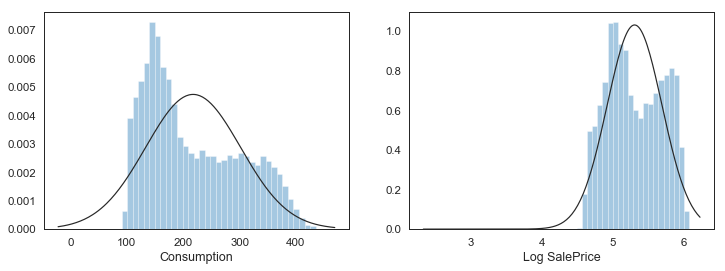

In [20]:
from scipy.stats import norm, skew
plt.figure(figsize=(12,4))
plt.subplot(1, 2, 1)
sns.distplot(df.Consumption, kde=False, fit = norm)

plt.subplot(1, 2, 2)
sns.distplot(np.log(df.Consumption), kde=False, fit = norm)
plt.xlabel('Log SalePrice')

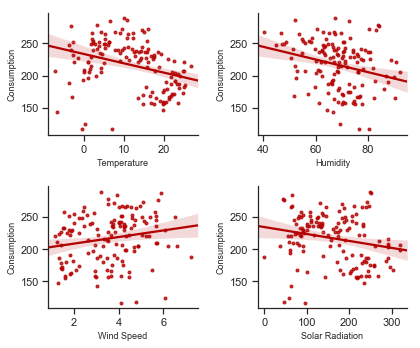

In [21]:
df1=df.loc[:,['Consumption','T-C','RH-%','solarRadiation-W/m2','windSpeed-m/s']]
dfweek=df1.resample('W', how=np.mean)
dfweek=dfweek[['Consumption','T-C','RH-%','solarRadiation-W/m2','windSpeed-m/s']]

sns.set_style("whitegrid", {'axes.grid' : False})
sns.set_context("paper", font_scale=1.3)  

fig = plt.figure(figsize=(6,5))
sns.set(style="ticks")
#fig.subplots_adjust(hspace=.1)

ax1 = fig.add_subplot(2,2,1)
ax1 = sns.regplot(x="T-C", y="Consumption", data=dfweek, marker='.', color='#b30000')
ax1.set_ylabel('Consumption', fontsize=9)
ax1.set_xlabel('Temperature', fontsize=9)
plt.tight_layout()

ax2 = fig.add_subplot(2,2,2)
ax2 = sns.regplot(x="RH-%", y="Consumption", data=dfweek, marker='.', color='#b30000')
ax2.set_ylabel('Consumption', fontsize=9)
ax2.set_xlabel('Humidity', fontsize=9)
plt.tight_layout()

ax3 = fig.add_subplot(2,2,3)
ax3 = sns.regplot(x="windSpeed-m/s", y="Consumption", data=dfweek, marker='.',color='#b30000')
ax3.set_ylabel('Consumption', fontsize=9)
ax3.set_xlabel('Wind Speed', fontsize=9)
plt.tight_layout()
sns.despine(top=True)

ax4 = fig.add_subplot(2,2,4)
ax4 = sns.regplot(x="solarRadiation-W/m2", y="Consumption", data=dfweek, marker='.',color='#b30000')
ax4.set_ylabel('Consumption', fontsize=9)
ax4.set_xlabel('Solar Radiation', fontsize=9)
plt.tight_layout()
sns.despine(top=True)
plt.savefig('Fig4.png', dpi=300)

### High Correlation between Features

In [22]:
dfc_corr=dfc.corr()
#maximum correlation between features
#the matrix is symmetric so we need to extract upper triangle matrix without diagonal (k = 1)
oc = (dfc_corr.where(np.triu(np.ones(dfc_corr.shape), k=1).astype(np.bool))
                 .stack()
                 .sort_values(ascending=False))

print("Top 10 highest positive correlation coefficients between features")
max_corr_pos = oc.head(10)
display(max_corr_pos)
print("  ")
print("Top 5 highest negative correlation coefficients between features")
max_corr_neg = oc.tail(5)
display(max_corr_neg)

Top 10 highest positive correlation coefficients between features


Tdew-C               humidityRatio-kg/kg   0.95
T-C                  Tdew-C                0.88
                     humidityRatio-kg/kg   0.85
humidityRatio-kg/kg  dehumidification      0.82
Tdew-C               dehumidification      0.64
T-C                  dehumidification      0.58
RH-%                 Tdew-C                0.45
                     humidityRatio-kg/kg   0.39
T-C                  solarRadiation-W/m2   0.38
Consumption          solarRadiation-W/m2   0.34
dtype: float64

  
Top 5 highest negative correlation coefficients between features


pressure-mbar  humidityRatio-kg/kg   -0.20
Tdew-C         pressure-mbar         -0.21
Consumption    RH-%                  -0.30
pressure-mbar  windSpeed-m/s         -0.36
RH-%           solarRadiation-W/m2   -0.48
dtype: float64

In [23]:
df1=df1.iloc[:1000,:]
df1.shape

(1000, 5)

In [24]:
df1=df.loc[:,['Consumption', 'RH-%', 'T-C', 'Tdew-C','windSpeed-m/s', 'occupancy', 'quarter', 'month', 
              'day', 'weekday']]

from sklearn.decomposition import PCA
df1 = df1.drop('Consumption', axis=1)
# Scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
df1[['RH-%', 'T-C', 'Tdew-C', 'windSpeed-m/s', 'quarter', 'month', 'day']] = scaler.fit_transform(df1
                                                                                                              [['RH-%', 'T-C', 'Tdew-C', 'windSpeed-m/s', 'quarter', 'month', 'day']]);

In [25]:
#data1 = data1.drop('id', axis=1)
pca = PCA()
pca.fit(df1)
exp_var_ratio = pca.explained_variance_ratio_
cumulative_var_ratio = np.zeros(exp_var_ratio.shape)
for i in range(len(cumulative_var_ratio)):
    cumulative_var_ratio[i] = np.sum(exp_var_ratio[0:i+1])
exp_var_ratio = np.concatenate((exp_var_ratio.reshape(1,len(exp_var_ratio)), cumulative_var_ratio.reshape(1,len(cumulative_var_ratio))), axis=0)
pd.set_option('display.max_columns', 100)
display(pd.DataFrame(exp_var_ratio, columns = ['PC_'+str(i+1) for i in range(df1.shape[1])], index = ['Proportion of variance', 'Cumulative proportion']))

,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,PC_7,PC_8,PC_9
Proportion of variance,0.32,0.31,0.12,0.10,0.07,0.06,0.01,0.00,0.00
Cumulative proportion,0.32,0.63,0.75,0.85,0.92,0.98,0.99,1.00,1.00


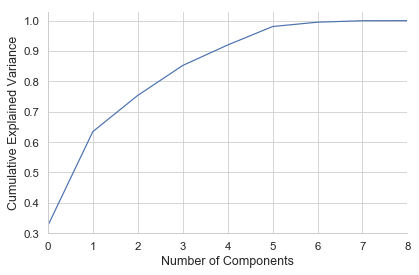

In [26]:
pca = PCA().fit(df1)
#fig, ax = plt.subplots()

sns.set_style("whitegrid", {'axes.grid' : False})
sns.set_context("paper", font_scale=1.3)  
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.grid(True)
#ax.grid(linestyle='-', linewidth='0.2', color='black')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance');
axes = plt.gca()
axes.set_xlim([0,8])
axes.set_ylim([0.3,1.03])
plt.tight_layout()
sns.despine(top=True)
plt.savefig('Fig1.png', dpi=300)

In [ ]:
# creating a biplot

pca = PCA(n_components=2).fit(df1)
reduced_data = pca.transform(df1)
pca_samples = pca.transform(df1)
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])

def biplot(data, reduced_data, pca):
    
    fig, ax = plt.subplots(figsize = (8,8))
    
    # scatterplot of the reduced data 
    ax.scatter(x=reduced_data.loc[:, 'Dimension 1'], y=reduced_data.loc[:, 'Dimension 2'], facecolors='b', edgecolors='b', s=10, alpha=0.1)
    
    feature_vectors = pca.components_.T

    # using scaling factors to make the arrows
    arrow_size, text_pos = 7.0, 8.0,

    # projections of the original features
    for i, v in enumerate(feature_vectors):
        ax.arrow(0, 0, arrow_size*v[0], arrow_size*v[1], head_width=0.1, head_length=0.1, linewidth=2, color='red')
        ax.text(v[0]*text_pos, v[0]*text_pos, df1.columns[i], color='black', ha='center', va='center', fontsize=12)

    ax.set_xlabel("Dimension 1", fontsize=14)
    ax.set_ylabel("Dimension 2", fontsize=14)
    ax.set_title("PC plane with original feature projections.", fontsize=12);
    return ax

biplot(df1, reduced_data, pca)

In [27]:
# Saving PCA results to dataframe
a=pd.DataFrame(exp_var_ratio, columns = ['PC_'+str(i+1) for i in range(df1.shape[1])], index = ['Proportion of variance', 'Cumulative proportion'])
writer = pd.ExcelWriter('PCA.xlsx')
a.to_excel(writer,'Sheet1')
writer.save()

In [28]:
from sklearn import decomposition
pca = decomposition.PCA(n_components=5)
df1_prime = pca.fit_transform(df1)
df1_prime.shape
pca.explained_variance_ratio_.sum()

0.9198547693151449

## Machine Learning Modeling for Feature Importance

In [29]:
print(df.index.min())
print(df.index.max())

2012-01-01 01:00:00
2014-10-31 00:00:00


In [36]:
# Define training and testing periods
train_start = '2012-01-01'
train_end = '2014-04-22'
test_start = '2014-04-23'
test_end = '2014-10-31'

In [37]:
df.columns

Index(['Consumption', 'startTime', 'endTime', 'RH-%', 'T-C', 'Tdew-C',
       'pressure-mbar', 'solarRadiation-W/m2', 'windDirection',
       'windSpeed-m/s', 'humidityRatio-kg/kg', 'coolingDegrees',
       'heatingDegrees', 'dehumidification', 'occupancy', 'cosHour', 'year',
       'quarter', 'month', 'day', 'weekday'],
      dtype='object')

In [38]:
# 09 Features
df1=df.loc[:,['Consumption', 'RH-%', 'T-C', 'Tdew-C','windSpeed-m/s', 'occupancy', 'quarter', 'month', 
              'day', 'weekday']]

In [39]:
# 04 Features
df1=df.loc[:,['Consumption', 'RH-%', 'T-C', 'occupancy','day', ]]


# 04 Features
df1=df.loc[:,['Consumption', 'RH-%','T-C', 'occupancy']]

# 09 Features
df1=df.loc[:,['Consumption', 'RH-%', 'T-C','windSpeed-m/s', 'occupancy', 'quarter', 'month', 
              'day', 'weekday']]

In [40]:
df1=df.loc[:,['Consumption']]

In [41]:
# Time Lags Consumption
for obs in range(1,5):
    df1["T_" + str(obs)] = df1.Consumption.shift(obs)
df1=df1.dropna()

In [46]:
df1.head(2)

,Consumption,T_1,T_2,T_3,T_4
Date,,,,,
2012-01-01 05:00:00,111.13,116.01,119.01,117.99,111.48
2012-01-01 06:00:00,111.62,111.13,116.01,119.01,117.99


In [48]:
# Scaling 09 features with time lags
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
df1[['T_1', 'T_2', 'T_3', 'T_4']] = scaler.fit_transform(df1[['T_1', 'T_2', 'T_3', 'T_4']]);

In [49]:
# Split up into training and testing sets (still in Pandas dataframes)

X_train = df1[train_start:train_end]
del X_train['Consumption']

y_train = df1['Consumption'][train_start:train_end]

X_test = df1[test_start:test_end]
del X_test['Consumption']

y_test = df1['Consumption'][test_start:test_end]

In [61]:
# Split up into training and testing sets (still in Pandas dataframes)

X_train = df1[train_start:train_end]
del X_train['Consumption']

y_train = df1['Consumption'][train_start:train_end]
y_train_log=np.log(y_train)

X_test = df1[test_start:test_end]
del X_test['Consumption']

y_test = df1['Consumption'][test_start:test_end]
y_test_log=np.log(y_test)

In [62]:
print ('Number of observations in the Training set:', len(X_train))
print ('Percentage of data in Training set:', len(X_train)/len(df1)*100)
print ('Number of observations in the Test set: ', len(X_test))
print ('Percentage of data in Test set:', len(X_test)/len(df1)*100)

Number of observations in the Training set: 18492
Percentage of data in Training set: 80.16299635859198
Number of observations in the Test set:  4576
Percentage of data in Test set: 19.83700364140801


In [63]:
X_train.head()

,T_1,T_2,T_3,T_4
Date,,,,
2012-01-01 05:00:00,0.25,0.25,0.25,0.24
2012-01-01 06:00:00,0.23,0.25,0.25,0.25
2012-01-01 07:00:00,0.24,0.23,0.25,0.25
2012-01-01 08:00:00,0.26,0.24,0.23,0.25
2012-01-01 09:00:00,0.31,0.26,0.24,0.23


In [64]:
df.Consumption.head(2)

Date
2012-01-01 01:00:00   111.48
2012-01-01 02:00:00   117.99
Name: Consumption, dtype: float64

In [65]:
y_train.head()

Date
2012-01-01 05:00:00   111.13
2012-01-01 06:00:00   111.62
2012-01-01 07:00:00   122.34
2012-01-01 08:00:00   142.80
2012-01-01 09:00:00   151.89
Name: Consumption, dtype: float64

## Ensemble Models

In [66]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import math

def MAPError(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean((np.abs(y_true - y_pred)) / (y_true)) * 100

### 1. Random Forest

In [67]:
from sklearn.ensemble import RandomForestRegressor
RF = RandomForestRegressor(n_estimators=300, max_depth=10, n_jobs=-1,random_state=0)
RF.fit(X_train, y_train)

# Calculate root mean squared error
print('Root Mean Square Error')
trainScore = math.sqrt(mean_squared_error(y_train, RF.predict(X_train)))
print('Train Score: %.3f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(y_test, RF.predict(X_test)))
print('Test Score: %.2f RMSE' % (testScore))
print('Mean Absolute Error')
from sklearn.metrics import mean_absolute_error
print('Train Score: %.2f MAE', mean_absolute_error(y_train, RF.predict(X_train)))
print('Test Score: %.2f MAE', mean_absolute_error(y_test, RF.predict(X_test)))
print('Mean Absolute Percentafe Error')

print('Train Score: %.2f MAPE', MAPError(y_train, RF.predict(X_train)))
print('Test Score: %.2f MAPE', MAPError(y_test, RF.predict(X_test)))

Root Mean Square Error
Train Score: 10.308 RMSE
Test Score: 12.58 RMSE
Mean Absolute Error
Train Score: %.2f MAE 7.269838282432233
Test Score: %.2f MAE 8.42663823175107
Mean Absolute Percentafe Error
Train Score: %.2f MAPE 3.450246465818004
Test Score: %.2f MAPE 4.418233873773417


feature,T_1,T_4,T_3,T_2
importance,0.95,0.03,0.01,0.01


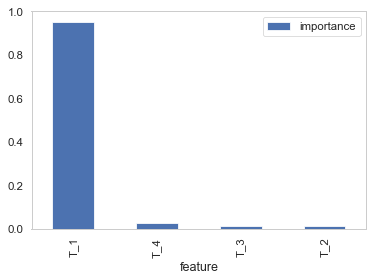

In [68]:
importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(RF.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')

importances.plot.bar()
 
importances.transpose()

### 2. Extra Trees Regressor

In [69]:
from sklearn.ensemble import ExtraTreesRegressor
ET = ExtraTreesRegressor(n_estimators=400, max_depth=11, n_jobs=-1, random_state=0)
ET.fit(X_train, y_train)

# Calculate root mean squared error
print('Root Mean Square Error')
trainScore = math.sqrt(mean_squared_error(y_train, ET.predict(X_train)))
print('Train Score: %.3f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(y_test, ET.predict(X_test)))
print('Test Score: %.2f RMSE' % (testScore))
print('Mean Absolute Error')
from sklearn.metrics import mean_absolute_error
print('Train Score: %.2f MAE', mean_absolute_error(y_train, ET.predict(X_train)))
print('Test Score: %.2f MAE', mean_absolute_error(y_test, ET.predict(X_test)))
print('Mean Absolute Percentafe Error')
print('Train Score: %.2f MAPE', MAPError(y_train, ET.predict(X_train)))
print('Test Score: %.2f MAPE', MAPError(y_test, ET.predict(X_test)))

Root Mean Square Error
Train Score: 11.924 RMSE
Test Score: 12.66 RMSE
Mean Absolute Error
Train Score: %.2f MAE 8.283887986100162
Test Score: %.2f MAE 8.708020739744125
Mean Absolute Percentafe Error
Train Score: %.2f MAPE 3.9004127070398615
Test Score: %.2f MAPE 4.613856003680098


### 3.  Gradient Boosting

In [70]:
from sklearn.ensemble import GradientBoostingRegressor
GB = GradientBoostingRegressor(n_estimators=200, max_depth=6, random_state=0)
GB.fit(X_train, y_train)
#print(ET.feature_importances_)

# Calculate root mean squared error
print('Root Mean Square Error')
trainScore = math.sqrt(mean_squared_error(y_train, GB.predict(X_train)))
print('Train Score: %.3f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(y_test, GB.predict(X_test)))
print('Test Score: %.2f RMSE' % (testScore))
print('Mean Absolute Error')
from sklearn.metrics import mean_absolute_error
print('Train Score: %.2f MAE', mean_absolute_error(y_train, GB.predict(X_train)))
print('Test Score: %.2f MAE', mean_absolute_error(y_test, GB.predict(X_test)))
print('Mean Absolute Percentafe Error')
print('Train Score: %.2f MAPE', MAPError(y_train, GB.predict(X_train)))
print('Test Score: %.2f MAPE', MAPError(y_test, GB.predict(X_test)))

Root Mean Square Error
Train Score: 10.001 RMSE
Test Score: 12.75 RMSE
Mean Absolute Error
Train Score: %.2f MAE 7.147447673622357
Test Score: %.2f MAE 8.528161274815512
Mean Absolute Percentafe Error
Train Score: %.2f MAPE 3.3682684457189818
Test Score: %.2f MAPE 4.475865623159221


### 4. XGBoost

In [71]:
import xgboost
# Let's try XGboost algorithm to see if we can get better results
xgb = xgboost.XGBRegressor(n_estimators=300, max_depth=7)
model=xgb.fit(X_train,y_train_log)
# Use the forest's predict method on the test data
predictions = xgb.predict(X_test)

# Calculate root mean squared error
print('Root Mean Square Error')
trainScore = math.sqrt(mean_squared_error(y_train, xgb.predict(X_train)))
print('Train Score: %.3f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(y_test, xgb.predict(X_test)))
print('Test Score: %.2f RMSE' % (testScore))
print('Mean Absolute Error')
from sklearn.metrics import mean_absolute_error
print('Train Score: %.2f MAE', mean_absolute_error(y_train, xgb.predict(X_train)))
print('Test Score: %.2f MAE', mean_absolute_error(y_test, xgb.predict(X_test)))
print('Mean Absolute Percentafe Error')
print('Train Score: %.2f MAPE', MAPError(y_train, xgb.predict(X_train)))
print('Test Score: %.2f MAPE', MAPError(y_test, xgb.predict(X_test)))

Root Mean Square Error
Train Score: 232.937 RMSE
Test Score: 208.51 RMSE
Mean Absolute Error
Train Score: %.2f MAE 217.1087203561936
Test Score: %.2f MAE 193.00596319016606
Mean Absolute Percentafe Error
Train Score: %.2f MAPE 97.30389298807088
Test Score: %.2f MAPE 97.01866821562575


Text(0.5, 0, 'Relative Importance')

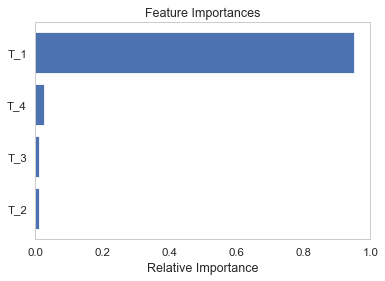

In [72]:
features = X_train.columns
importances = RF.feature_importances_
indices = np.argsort(importances)
plt.figure(1)
plt.title('Feature Importances')
plt.barh(range(len(indices[:15])), importances[indices[:15]], color='b', align='center')
plt.yticks(range(len(indices[:15])), features[indices[:15]])
plt.xlabel('Relative Importance')

Text(0.5, 0, 'Relative Importance')

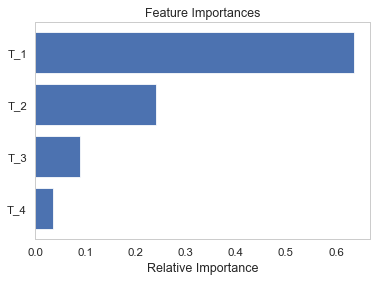

In [73]:
features = X_train.columns
importances = ET.feature_importances_
indices = np.argsort(importances)
plt.figure(1)
plt.title('Feature Importances')
plt.barh(range(len(indices[:15])), importances[indices[:15]], color='b', align='center')
plt.yticks(range(len(indices[:15])), features[indices[:15]])
plt.xlabel('Relative Importance')

Text(0.5, 0, 'Relative Importance')

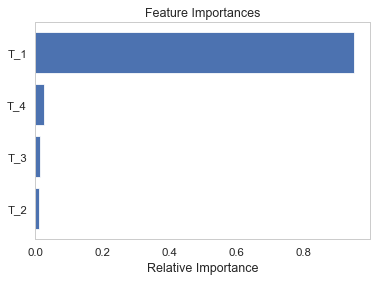

In [74]:
features = X_train.columns
importances = GB.feature_importances_
indices = np.argsort(importances)
plt.figure(1)
plt.title('Feature Importances')
plt.barh(range(len(indices[:15])), importances[indices[:15]], color='b', align='center')
plt.yticks(range(len(indices[:15])), features[indices[:15]])
plt.xlabel('Relative Importance')

Text(0.5, 0, 'Relative Importance')

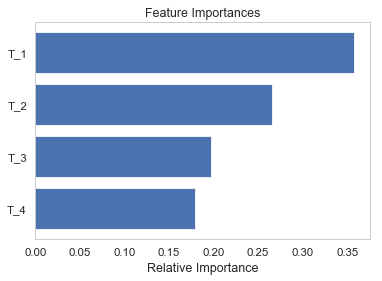

In [75]:
features = X_train.columns
importances = xgb.feature_importances_
indices = np.argsort(importances)
plt.figure(1)
plt.title('Feature Importances')
plt.barh(range(len(indices[:15])), importances[indices[:15]], color='b', align='center')
plt.yticks(range(len(indices[:15])), features[indices[:15]])
plt.xlabel('Relative Importance')

In [76]:
pd.options.display.float_format = '{:,.4f}'.format
feats = {} # a dict to hold feature_name: feature_importance

for feature, importance in zip(X_train.columns, RF.feature_importances_):
    feats[feature] = importance #add the name/value pair 

importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Random Forest'})
#importances.sort_values(by='Gini-importance').plot(kind='bar', rot=45)

# Extra Trees
for feature, importance in zip(X_train.columns, ET.feature_importances_):
    feats[feature] = importance #add the name/value pair 

importances1 = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Extra Trees'})


#Gradient Boosting
for feature, importance in zip(X_train.columns, GB.feature_importances_):
    feats[feature] = importance #add the name/value pair 

importances2 = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gradient Boosting'})

#XGBoost
for feature, importance in zip(X_train.columns, xgb.feature_importances_):
    feats[feature] = importance #add the name/value pair 

importances3 = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'XGBoost'})

In [77]:
a=pd.merge(importances, importances1,right_index=True, left_index=True)
b=pd.merge(a, importances2,right_index=True, left_index=True)
c=pd.merge(b, importances3,right_index=True, left_index=True)

In [78]:
c.index

Index(['T_1', 'T_2', 'T_3', 'T_4'], dtype='object')

In [79]:
# 09 features index rename
c=c.rename(index={'RH-%': 'Humidity','T-C':'Temperature','Tdew-C':'DewPointTemp',
                  'windSpeed-m/s':'WindSpeed',
               'occupancy':'Occupancy','quarter':'Quarter','month':'Month',
               'day':'Day','weekday':'Weekday'})


In [80]:
# Only lags rename
c=c.rename(index={'T_1':'Lag1', 'T_2':'Lag2', 'T_3':'Lag3', 'T_4':'Lag4'})


In [81]:
# With Lags
c=c.rename(index={'RH-%': 'Humidity','T-C':'Temperature','Tdew-C':'DewPt_Temp',
                  'windSpeed-m/s':'WindSpeed',
               'occupancy':'Occupancy','quarter':'Quarter','month':'Month',
               'day':'Day','weekday':'Weekday','T_1':'Lag1', 'T_2':'Lag2'})

## Mean Feature Importance Plot

#### Without Lags

In [ ]:
mean_score=c.mean(axis=1)
mean_score=mean_score.sort_values(ascending=False)
sns.set_style("whitegrid", {'axes.grid' : False})
sns.set_context("paper", font_scale=1.4)  
plt.figure(figsize=(6,4))
mean_score.plot(kind='bar',color='#1f77b4')
plt.xticks(rotation=30)
plt.xlabel('Features')
plt.ylabel('Score')
sns.despine(left=True)
plt.tight_layout()
plt.savefig('Fig1.png', bbox_inches='tight', dpi=400) 

### RFE using Random Forest

In [ ]:
from sklearn.feature_selection import RFE
# Create the RFE object and rank each pixel
clf_rf_3 = RandomForestRegressor()      
rfe = RFE(estimator=clf_rf_3, n_features_to_select=5, step=1)
rfe = rfe.fit(X_train, y_train)
print('Chosen best 5 feature by rfe:',X_train.columns[rfe.support_])


## Recursive Feature Elimination with CV for Rgression

In [ ]:
from sklearn.feature_selection import RFECV

# The "accuracy" scoring is proportional to the number of correct classifications
clf_rf_4 = xgboost.XGBRegressor() 
rfecv = RFECV(estimator=clf_rf_4, step=1, cv=5,scoring='neg_mean_squared_error')   #5-fold cross-validation
rfecv = rfecv.fit(X_train, y_train)

print('Optimal number of features :', rfecv.n_features_)
print('Best features :', X_train.columns[rfecv.support_])

# Plot number of features VS. cross-validation scores
import matplotlib.pyplot as plt
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score of number of selected features")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

In [ ]:
df1.head(2)

### LASSO Model

In [66]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso

alpha_ridge = [1e-5, 1e-4, 1e-3, 1e-2, 1, 5, 10, 20]

coeffs = {}
for alpha in alpha_ridge:
    r = Lasso(alpha=alpha, normalize=True, max_iter=1000000)
    r = r.fit(X_train, y_train_log)
    
grid_search = GridSearchCV(Lasso(alpha=alpha, normalize=True), scoring='neg_mean_squared_error',
                           param_grid={'alpha': alpha_ridge}, cv=10, n_jobs=-1)
grid_search.fit(X_train, y_train_log)

print (grid_search.best_estimator_)
print (grid_search.score(X_train, y_train_log))

Lasso(alpha=1e-05, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=True, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)
-0.10111582387758537


In [67]:
grid_search.best_estimator_

Lasso(alpha=1e-05, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=True, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [89]:
lasso = Lasso(alpha=.0001, normalize=True, max_iter=1e6)
lasso = lasso.fit(X_train, y_train)

In [90]:
coef = pd.Series(lasso.coef_, index = X_train.columns)
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Lasso picked 4 variables and eliminated the other 0 variables


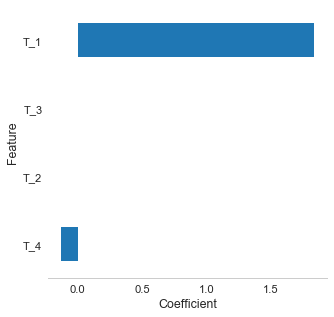

In [79]:
sns.set_style("whitegrid", {'axes.grid' : False})
sns.set_context("paper", font_scale=1.4)  

#imp_coef1 = pd.concat([coef.sort_values().head(10),coef.sort_values().tail(10)])

imp_coef1 = coef.sort_values().head(10)
plt.rcParams['figure.figsize'] = (5.0, 5.0)

imp_coef1=imp_coef1.rename(index={'RH-%': 'Humidity','T-C':'Temperature','Tdew-C':'DewPointTemp',
                  'windSpeed-m/s':'WindSpeed','occupancy':'Occupancy','Tdew-C':'DewPtTemp',
                                  'quarter':'Quarter','month':'Month','day':'Day','weekday':'Weekday'})



imp_coef1.plot(kind = "barh",color='#1f77b4')
#plt.title("Coefficients in the Lasso Model")
plt.xlabel('Coefficient')
plt.ylabel('Feature')
sns.despine(left=True)
plt.savefig('Fig1.png', bbox_inches='tight', dpi=400) 

In [80]:
print('Mean Absolute Percentage Error')
print('Train Score: %.2f MAPE', MAPError(y_train, np.exp(lasso.predict(X_train))))
print('Test Score: %.2f MAPE', MAPError(y_test, np.exp(lasso.predict(X_test))))

Mean Absolute Percentage Error
Train Score: %.2f MAPE 8.106074136958002
Test Score: %.2f MAPE 10.032171685440506


In [91]:
print('Mean Absolute Percentage Error')
print('Train Score: %.2f MAPE', MAPError(y_train, lasso.predict(X_train)))
print('Test Score: %.2f MAPE', MAPError(y_test, lasso.predict(X_test)))

Mean Absolute Percentage Error
Train Score: %.2f MAPE 5.064788873748722
Test Score: %.2f MAPE 5.562058217620224


In [81]:
y_test[0:5]

Date
2014-04-23 00:00:00   197.34
2014-04-23 01:00:00   182.52
2014-04-23 02:00:00   172.03
2014-04-23 03:00:00   165.13
2014-04-23 04:00:00   161.64
Name: Consumption, dtype: float64

In [83]:
np.exp(lasso.predict(X_test))

array([232.67352885, 180.06330972, 169.78906008, ..., 271.35247244,
       245.1278686 , 186.97628276])